In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('aug_train.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<AxesSubplot:>

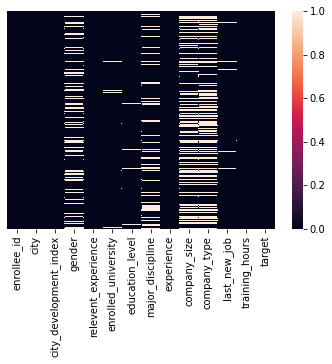

In [6]:
sns.heatmap(data.isna(), yticklabels= False)

terdapat data missing value di sebagian feature

In [7]:
#data= data.fillna('Unknown')
data['target']= data['target'].astype('int')

Tujuan mengisi missing value dengan 'Unknown' agar tidak mengganggu analysis data, namun untuk modeling, akan di impute sesuai kebutuhan feature.

In [8]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [9]:
data.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

- Target: 
>* 'target'
>1. 0: Stay
>2. 1: Resign (berkeinginan bekerja di perusahaan yang mengadakan training)
- Category Feature:
>* 'city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job'

- Numberic Feature:
>* 'city_development_index','training_hours'

'enrollee_id' merupakan unique column dan tidak dapat digunakan untuk analysis


# Target

In [10]:
data['target'].value_counts()

0    14381
1     4777
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

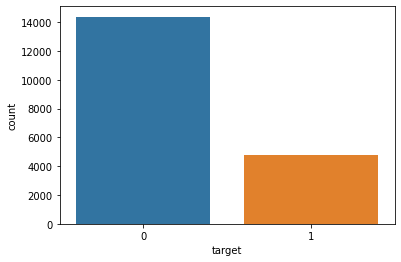

In [11]:
sns.countplot(data['target'])

dari plot diatas, kita bisa melihat bahwa ada kecenderungan data imbalance

# Category VS Target:

In [12]:
cat_feature= ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

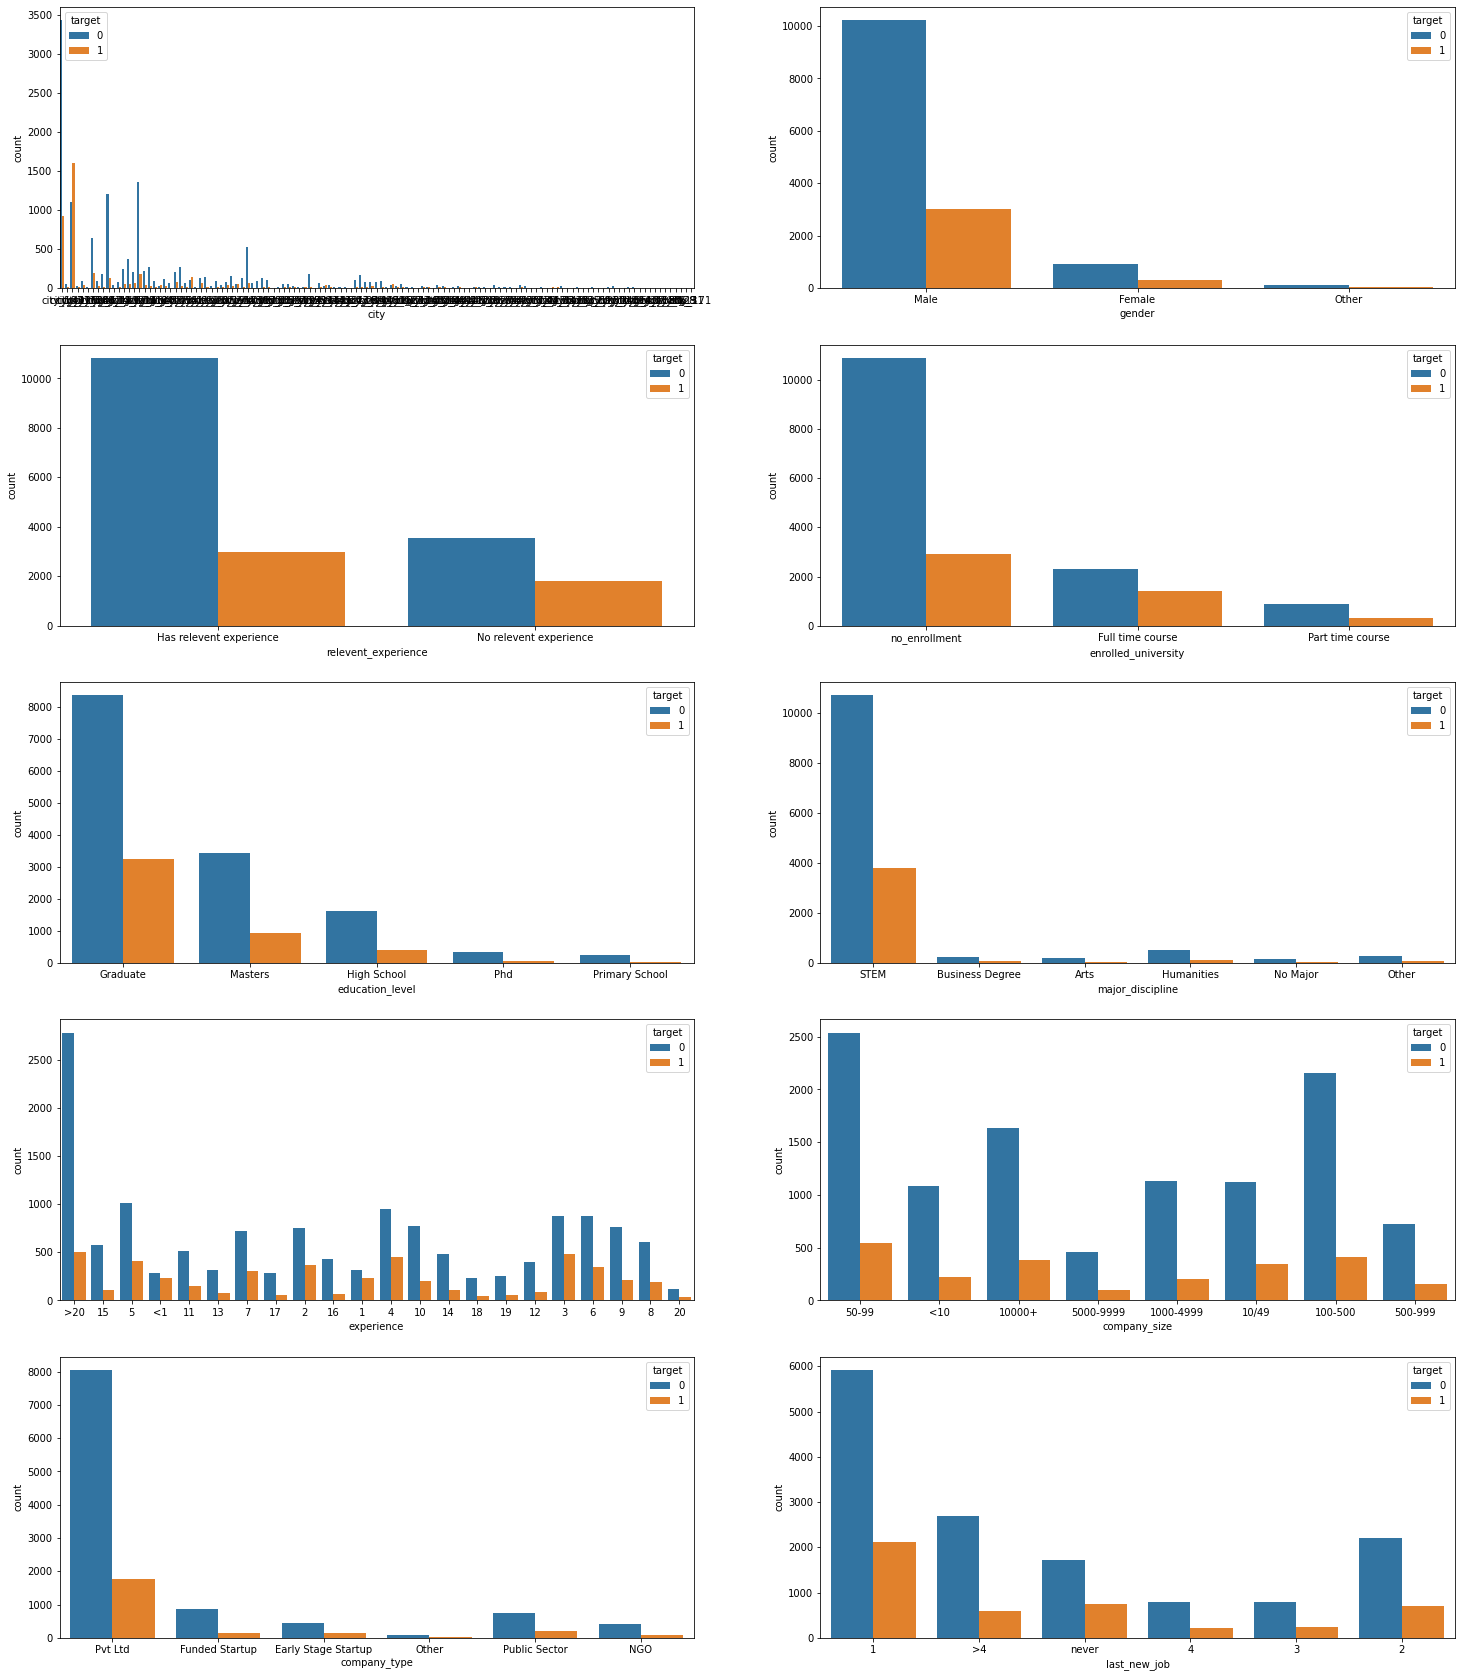

In [14]:
fig, axes= plt.subplots(5,2, figsize=(25,30))
for cat, ax in zip(cat_feature, axes.flatten()):
    sns.countplot(cat, data= data, hue= 'target', ax=ax)

In [ ]:
def pct_count(column): #fungsi untuk menghitung persentase resign(berkeinginan bekerja di perusahaan yang mengadakan training)
    col= data[data['target']== 1][column].value_counts()
    pct= pd.DataFrame({'pct' : round(col/ data[column].value_counts()*100,2)}).reset_index()
    uniq= pd.DataFrame({'Unique':col.index.unique()}).reset_index()
    return uniq.merge(pct, left_on= 'Unique', right_on= 'index').drop(['index_x','index_y'],axis= 1).set_index('Unique').sort_values('pct%', ascending= False)

In [ ]:
for i in cat_feature:
    print(f'Persentase {i} yang resign(berkeinginan bekerja di perusahaan yang mengadakan training)')
    print(pct_count(i))
    print('\n')

#### Kesimpulan :
* city memiliki banyak Unique data yang menyebabkan plot menjadi sulit dibaca. **Dari hasil perhitungan persentase resign, hasil analisa city menjadi bias karena memiliki banyak Unique data**, misalkan 1 jenis kota hanya 1 orang yang training dan orang tersebut memilih resign(berkeinginan bekerja di perusahaan yang mengadakan training; target= 1) yang mengakibatkan persentase permisalan ini 100pct

* Gender female dan other memiliki persentase yang seimbang yaitu 26%, yang mengartikan **gender female dan other lebih tertarik untuk resign dibandingkan male**

* Kandidat yang memiliki pengalaman yang relevan memiliki persentase yang lebih kecil, kemungkinan hal tsb terjadi karena **sudah bekerja di bidang yang sama atau kandidat mengikuti training untuk memperdalam pengetahuan dibidang tsb**. Sedangkan kandidat yang belum memiliki pengalaman yang relevan memiliki persentase yang lebih besar, kemungkinan hal tsb terjadi karena **kandidat memiliki rasa penasaran dengan bidang tsb**.

* Kandidat yang terdaftar di universitas dengan Full Time Course memiliki persentase yang lebih tinggi dibanding yang lain karena **kemungkinan ada banyak kandidat yang baru akan bekerja(*akan di analisa lebih lanjut*)**, sedangkan yang mengambil Part Time Course atau Tidak terdaftar di universitas **sudah berkerja(*akan di analisa lebih lanjut*)**

* 